# Assignment 5
## Task 1
If you were to create a HMM for 22 two-state appliances, how much memory would your computer need if you wanted to fit the state-transition probability matrix into main memory with 4 byte precision? 

Answer: around 70 terra bytes

## What was given:

In [28]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

map1 = {'0,0':0, '1,0':1, '0,1':2, '1,1':3}
map2 = {0:'0,0', 1:'1,0', 2:'0,1', 3:'1,1'}
states = ['0,0', '1,0', '0,1', '1,1']

mu = {'0,0':1, '1,0':50, '0,1':55, '1,1':105}
sigma = {'0,0':0.1, '1,0':5.1, '0,1':6.1, '1,1':11.1}

trans_prob = [[0.8, 0.19, 0.01, 0], [0.32, 0.6, 0, 0.08], [0.1, 0, 0.7, 0.2], [0, 0.13,0.5, 0.37]]
initial_prob = [0.25, 0.25, 0.25, 0.25]

'''
The map function makes accessing the trans_prob's easy:

Let's say you want p(z_t = (1,1) | z_t-1 = (0,1))
This is just:

trans_prob[map1['0,1']][map1['1,1']]
'''

#This is how you would sample the initial state
z = []
z.append(np.random.choice(states, p = initial_prob))

x = [np.random.normal(mu[z[-1]], sigma[z[-1]])]

print(z,x)

['1,1'] [109.9941109870277]


## Task 2

In [29]:
#Solution:

for _ in range(100):
    z.append(np.random.choice(states, p = trans_prob[map1[z[-1]]]))
print(z)

for z_ in z[1:]:
    x.append(np.random.normal(mu[z_], sigma[z_]))

['1,1', '0,1', '0,0', '0,0', '0,0', '0,0', '0,0', '1,0', '1,0', '0,0', '0,0', '1,0', '1,0', '0,0', '0,0', '1,0', '1,0', '1,0', '0,0', '0,0', '0,0', '1,0', '1,0', '1,0', '1,0', '1,0', '0,0', '0,0', '1,0', '1,0', '1,0', '1,0', '0,0', '0,0', '0,0', '0,0', '1,0', '1,0', '1,0', '1,0', '1,0', '1,0', '1,1', '0,1', '0,1', '0,1', '1,1', '1,0', '1,0', '0,0', '0,0', '0,0', '1,0', '1,0', '1,0', '0,0', '0,0', '1,0', '1,0', '1,0', '1,0', '0,0', '0,1', '0,1', '0,1', '1,1', '1,1', '0,1', '0,1', '0,0', '0,0', '0,0', '1,0', '0,0', '0,0', '0,0', '0,0', '1,0', '1,1', '0,1', '0,1', '1,1', '0,1', '0,1', '0,1', '1,1', '0,1', '1,1', '0,1', '0,1', '1,1', '0,1', '0,1', '1,1', '0,1', '0,0', '0,0', '0,0', '1,0', '0,0', '0,0']


## Task 3

In [30]:
import scipy.stats

prob = 1
for i,(xt,zt) in enumerate(zip(x,z)):
    if i > 0:
        prob*= trans_prob[map1[z[i-1]]][map1[zt]]
    else:
        prob*= 0.25
    prob*= scipy.stats.norm(mu[zt], np.sqrt(sigma[zt])).pdf(xt)
    
print(prob)
#a better solution is to add log-probs

7.35807859563e-176


## Task 4

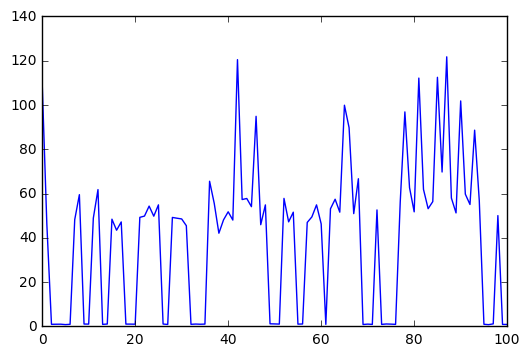

In [31]:
plt.plot(x)

## Task 5

In [32]:
gauss = lambda x, mu, sig:  1/(np.sqrt(2*np.pi)*sig)*np.exp(-0.5*(float(x-mu)/sig)**2)

# Solution:
P1 = []
for xt in x:
    slc = []
    for s in states:
        slc.append(gauss(xt, mu[s], sigma[s]))
    P1.append(slc/np.sum(slc))
    
P1 = np.array(P1)

## Task 6/7/8

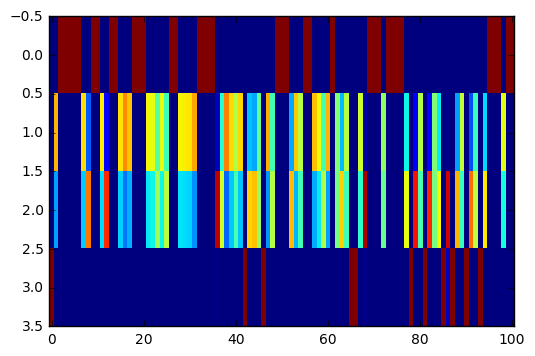

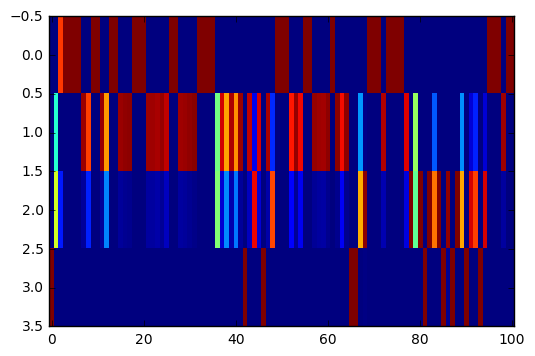

In [33]:
initial_prob_emit = []
for i in range(len(states)):
    initial_prob_emit.append(initial_prob[i] * gauss(x[0], mu[states[i]], sigma[states[i]]))
    
P2 = [initial_prob_emit]

for i, xt in enumerate(x[1:]):
    pztm1 = P2[i-1]
    slc = []
    for s in states:
        emit = gauss(xt, mu[s], sigma[s])
        tp = 0
        for j,s2 in enumerate(states):
            tp += trans_prob[j][map1[s]]*pztm1[j]
        slc.append(emit*tp)
        
    #print(slc)
            
    P2.append(slc)

P2 = np.array(P2)

#Task7:
P3 = (P2.T/np.sum(P2,axis=1)).T

#Task8:
plt.figure()
plt.imshow(P1.T, aspect='auto', interpolation='nearest')
plt.figure()
plt.imshow(np.array(P3).T, aspect='auto', interpolation='nearest')

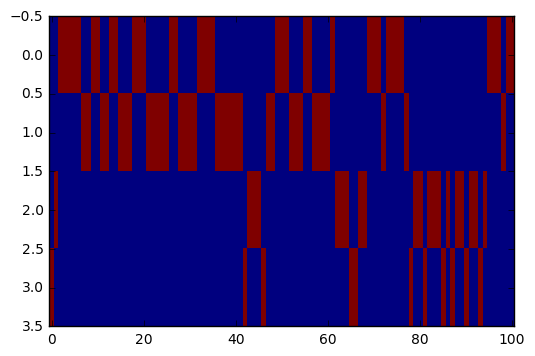

In [34]:
P0 = []
for zt in z:
    slc = np.zeros((4,))
    slc[map1[zt]] = 1
    P0.append(slc)
P0 = np.array(P0)

plt.imshow(np.array(P0).T, aspect='auto', interpolation='nearest')

## Task 9
Yes! The posterior of P3 is much sharper than P1 and when comparing to the ground truth, it avoids some of the error that the naive approach makes.